# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Pull information of data files
training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

#  Load files and save data to variable
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# Shape of image
image_shape = X_train[0].shape

# Number of classes
n_classes = len(set(y_train))

print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Count number of items in each class
import pandas as pd


#
# Method to extract name for a given ID
#
def get_name_from_id( id ):
    data = pd.read_csv('signnames.csv',sep=",")
    sign_name = {}
    for i in range(0, len(data)):
        sign_name[data.ClassId[i]] = data.SignName[i]
    
    return sign_name[id]


# Extract ids and associated sign name
sign_counts = {}
sign_id, counts = np.unique(y_train, return_counts=True)
sign_counts = dict(zip(sign_id, counts))


# Print statistics
for sign_id, count in sign_counts.items():
    print('Id =', sign_id, '-- Count= {}' .format(count), '-- Name: {}' .format(get_name_from_id(sign_id)) )

Id = 0 -- Count= 180 -- Name: Speed limit (20km/h)
Id = 1 -- Count= 1980 -- Name: Speed limit (30km/h)
Id = 2 -- Count= 2010 -- Name: Speed limit (50km/h)
Id = 3 -- Count= 1260 -- Name: Speed limit (60km/h)
Id = 4 -- Count= 1770 -- Name: Speed limit (70km/h)
Id = 5 -- Count= 1650 -- Name: Speed limit (80km/h)
Id = 6 -- Count= 360 -- Name: End of speed limit (80km/h)
Id = 7 -- Count= 1290 -- Name: Speed limit (100km/h)
Id = 8 -- Count= 1260 -- Name: Speed limit (120km/h)
Id = 9 -- Count= 1320 -- Name: No passing
Id = 10 -- Count= 1800 -- Name: No passing for vehicles over 3.5 metric tons
Id = 11 -- Count= 1170 -- Name: Right-of-way at the next intersection
Id = 12 -- Count= 1890 -- Name: Priority road
Id = 13 -- Count= 1920 -- Name: Yield
Id = 14 -- Count= 690 -- Name: Stop
Id = 15 -- Count= 540 -- Name: No vehicles
Id = 16 -- Count= 360 -- Name: Vehicles over 3.5 metric tons prohibited
Id = 17 -- Count= 990 -- Name: No entry
Id = 18 -- Count= 1080 -- Name: General caution
Id = 19 -- Co

Sign Id = 10  -- Name = No passing for vehicles over 3.5 metric tons


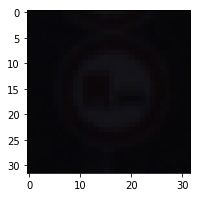

In [4]:
# Show a random sign and its Id and name

import random
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image)
print( 'Sign Id = {}' .format(y_train[index]), ' -- Name = {}' .format(get_name_from_id(y_train[index])) ) 


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Perform grayscale conversion and normalization as part of preprocessing of iamges

# Convert training and test data to grayscale
import cv2
import numpy as np

def convert_to_grayscale(image_data):
    data = []
    
    for i in range( 0, len(image_data) ):
        grayed = cv2.cvtColor( image_data[i], cv2.COLOR_RGB2GRAY )
        data.append(grayed)
    
    image = np.reshape( data, (-1, 32, 32, 1) )
    return image


# Check shape of image
print("Input image shape: ", format(X_train.shape))

X_train = convert_to_grayscale( X_train )
X_valid = convert_to_grayscale( X_valid )
X_test = convert_to_grayscale( X_test )

print("Grayscale conversion completed")


Input image shape:  (34799, 32, 32, 3)
Grayscale conversion completed


Input image shape:  (34799, 32, 32, 1)
Output image shape:  (34799, 32, 32, 1)
Completed Normalization
Sign Id = 10  -- Name = No passing for vehicles over 3.5 metric tons


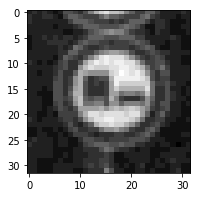

In [6]:
# Normalizing Data ( Method collected from Udacity lecture series )

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-1.0, 1.0]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = -1.0
    b = 1.0
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )


# Check shape of image
print("Input image shape: ", format(X_train.shape))

X_train = normalize_grayscale( X_train )
X_valid = normalize_grayscale( X_valid )
X_test = normalize_grayscale( X_test )

print("Output image shape: ", format(X_train.shape))
print("Completed Normalization")

image = X_train[index].squeeze()


# Check preprocessing results
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
print( 'Sign Id = {}' .format(y_train[index]), ' -- Name = {}' .format(get_name_from_id(y_train[index])) ) 


In [7]:
# Shuffle training data to remove biasness and hence improve accuracy
from sklearn.utils import shuffle

X_train, y_train = shuffle( X_train, y_train )

In [8]:
# Set batch size and number of epochs for the model
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

### Model Architecture

In [9]:
#
# Defining LeNet Model
# This is based on the LeNet model
# presented in the tensorflow lab
# in classroom
#
# Added dropout and L2-Regularization to the existing model
# to reduce overfitting
#

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.075
    beta = 0.001
    
    #
    ### Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
  
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    #
    ### Layer 2: Convolutional. Output = 10x10x16.
    #
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    
    #
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    #
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout( fc1, keep_prob )

    
    #
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    #
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Dropout
    fc2 = tf.nn.dropout( fc2, keep_prob )

    
    #
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    #
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    
    #
    # Calculating loss using L2 norm equation/method
    #
    l2_loss = beta*tf.nn.l2_loss(conv1_W) + beta*tf.nn.l2_loss(conv1_b) + \
                beta*tf.nn.l2_loss(conv2_W) + beta*tf.nn.l2_loss(conv2_b) + \
                beta*tf.nn.l2_loss(fc1_W) + beta*tf.nn.l2_loss(fc1_b) + \
                beta*tf.nn.l2_loss(fc2_W) + beta*tf.nn.l2_loss(fc2_b) + \
                beta*tf.nn.l2_loss(fc3_W) + beta*tf.nn.l2_loss(fc3_b)

    
    return logits, l2_loss

In [10]:
# Creating Placeholder for input, output, and dropout parameter

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
# Defining training operation

rate = 0.001

logits, l2_loss = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + l2_loss
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
# Evaluate the Model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
# Train the model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.65})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Traning Accuracy = {:.3f}" .format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Traning Accuracy = 0.604
Validation Accuracy = 0.558

EPOCH 2 ...
Traning Accuracy = 0.803
Validation Accuracy = 0.768

EPOCH 3 ...
Traning Accuracy = 0.900
Validation Accuracy = 0.861

EPOCH 4 ...
Traning Accuracy = 0.932
Validation Accuracy = 0.870

EPOCH 5 ...
Traning Accuracy = 0.951
Validation Accuracy = 0.900

EPOCH 6 ...
Traning Accuracy = 0.963
Validation Accuracy = 0.909

EPOCH 7 ...
Traning Accuracy = 0.969
Validation Accuracy = 0.914

EPOCH 8 ...
Traning Accuracy = 0.975
Validation Accuracy = 0.926

EPOCH 9 ...
Traning Accuracy = 0.977
Validation Accuracy = 0.937

EPOCH 10 ...
Traning Accuracy = 0.981
Validation Accuracy = 0.930

EPOCH 11 ...
Traning Accuracy = 0.986
Validation Accuracy = 0.941

EPOCH 12 ...
Traning Accuracy = 0.987
Validation Accuracy = 0.946

EPOCH 13 ...
Traning Accuracy = 0.988
Validation Accuracy = 0.948

EPOCH 14 ...
Traning Accuracy = 0.989
Validation Accuracy = 0.952

EPOCH 15 ...
Traning Accuracy = 0.988
Validation Accuracy 

In [14]:
# Evaluate with test images
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.933


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Image shape: (5, 32, 32, 3)
Labels shape: (5,)
Sign Id = 1.0  -- Name = Speed limit (30km/h)
Sign Id = 13.0  -- Name = Yield
Sign Id = 14.0  -- Name = Stop
Sign Id = 17.0  -- Name = No entry
Sign Id = 25.0  -- Name = Road work


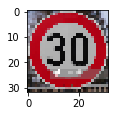

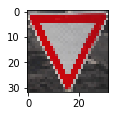

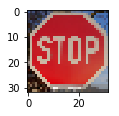

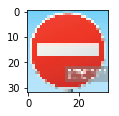

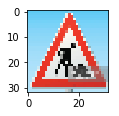

In [15]:
# Preparing and visualizing the downloaded images.
import cv2

# Reading inputfile and defining number of images
inputfile = pd.read_csv('downloaded_image/online_images.csv',sep=",")
n_images  = 5

labels_array = []
image_array = []
images = []

# Preparing images for LeNet Model
# Essentially converting them to 32x32x3 RGB images
# Also creating image array and label array for future use
for i in range(0,n_images):
    filename = 'downloaded_image/' + inputfile.Filename[i]
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32,32))
    
    images.append(image)
    labels_array = np.append(labels_array, inputfile.classID[i])
    images_array = np.asarray(images)

print("Image shape: {}" .format(images_array.shape))
print("Labels shape: {}" .format(labels_array.shape))


# Visualize images
zipped = zip( images_array, labels_array )
for image, label in zipped:
    plt.figure(figsize=(1.5,1.5))
    plt.imshow(image.squeeze())
    print( 'Sign Id = {}' .format(label), ' -- Name = {}' .format(get_name_from_id(label)) ) 


### Predict the Sign Type for Each Image

Image shape after grayscale and normalization: (5, 32, 32, 1)
Sign Id = 1.0  -- Name = Speed limit (30km/h)
Sign Id = 13.0  -- Name = Yield
Sign Id = 14.0  -- Name = Stop
Sign Id = 17.0  -- Name = No entry
Sign Id = 25.0  -- Name = Road work


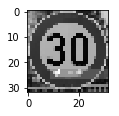

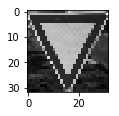

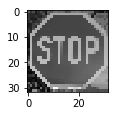

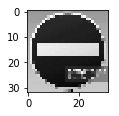

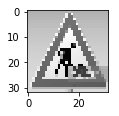

In [16]:
# Preprocessing online images : Converting to grayscale and then normalizing it.

images_array = convert_to_grayscale( images_array )
images_array = normalize_grayscale( images_array )
print("Image shape after grayscale and normalization: {}" .format(images_array.shape))

# Check images again after preprocess
zipped = zip( images_array, labels_array )
for image, label in zipped:
    plt.figure(figsize=(1.5,1.5))
    plt.imshow(image.squeeze(), cmap='gray')
    print( 'Sign Id = {}' .format(label), ' -- Name = {}' .format(get_name_from_id(label)) ) 


In [17]:
# Predicting sign of online images

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    predictions = tf.argmax(logits, 1)
    pred_array = predictions.eval(feed_dict={x: images_array, keep_prob: 1.0}, session=sess)

for i, pred in enumerate(pred_array):
    print('Predicted: {}' .format(get_name_from_id(pred)))
    print('Actual: ', get_name_from_id(labels_array[i]), '\n' )

Predicted: Speed limit (30km/h)
Actual:  Speed limit (30km/h) 

Predicted: Yield
Actual:  Yield 

Predicted: Stop
Actual:  Stop 

Predicted: No entry
Actual:  No entry 

Predicted: Road work
Actual:  Road work 



### Analyze Performance

In [18]:
# Calculate the accuracy of the prections

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    online_accuracy = evaluate(images_array, labels_array)
    print("Online Images Accuracy = {:.3f}".format(online_accuracy))

Online Images Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

def get_softmax_probs( input ):
    softmax = tf.nn.softmax(logits)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        
        softmaxProb = sess.run(softmax, feed_dict={x: input, keep_prob: 1.0})
        top_ks = sess.run(tf.nn.top_k(tf.constant(softmaxProb), k=5))  
        return top_ks
    
results = get_softmax_probs(images_array)
print("Top five topmax probabilites of german traffic signs found on web:")
print(results.values)
print("Corresponding label ID:")
print(results.indices)


Top five topmax probabilites of german traffic signs found on web:
[[  9.99999523e-01   4.43674679e-07   3.11366492e-12   1.71460339e-12
    1.40853941e-12]
 [  1.00000000e+00   2.55283381e-12   3.13366378e-14   2.54277664e-14
    7.02968525e-15]
 [  5.92689216e-01   1.49673149e-01   4.98649850e-02   4.93375361e-02
    4.56691384e-02]
 [  9.99999762e-01   2.48646245e-07   2.88019759e-08   1.07460414e-08
    3.67510355e-09]
 [  9.99999762e-01   2.60950316e-07   1.71834352e-11   4.61139937e-12
    6.27848305e-13]]
Corresponding label ID:
[[ 1  2  4 38  5]
 [13 15 12 35 14]
 [14 35 33 13 25]
 [17 40  9 14 33]
 [25 11 20 18 30]]


In [20]:
### Convert softmax ids to sign names

#
# Method to create names array from softmax id array
#
def convert_softmax_ids_to_name( indices ):
    name_array = []
    for row in range(0, results.indices.shape[0]):
        name_row = []
        for labels in results.indices[row]:
            name_row.append( get_name_from_id ( labels ) )
    
        name_array.append(name_row)
    return name_array


name_array = convert_softmax_ids_to_name( results.indices )


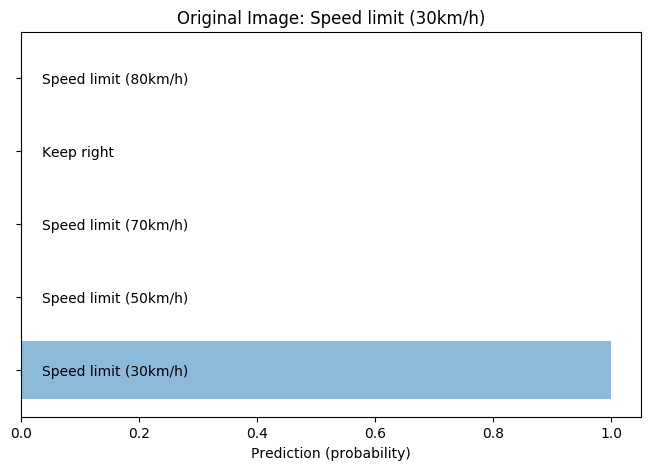

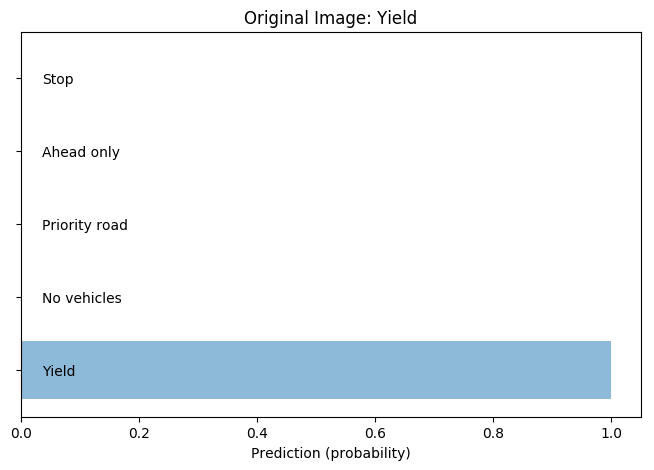

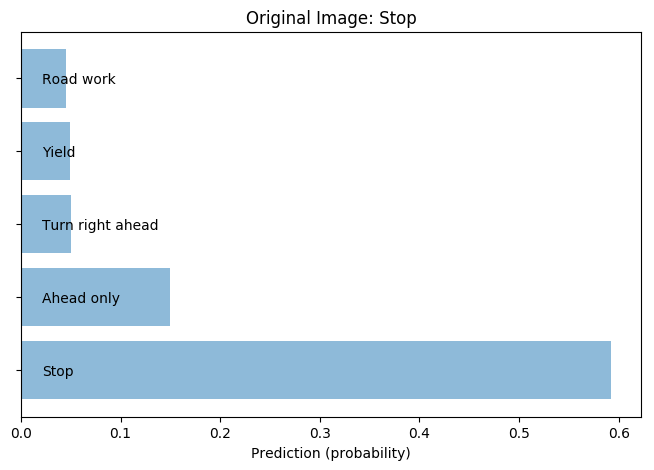

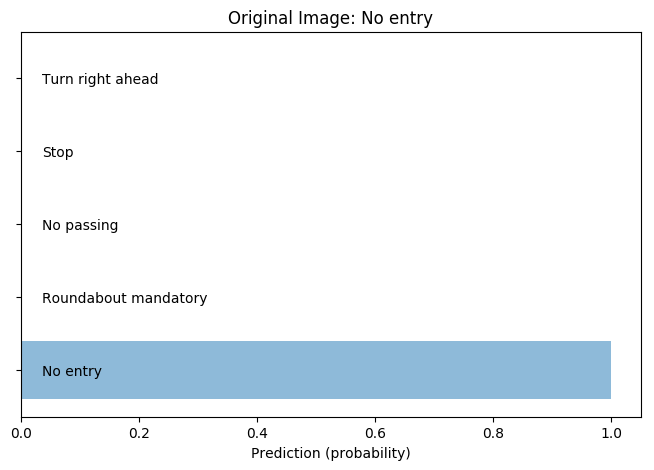

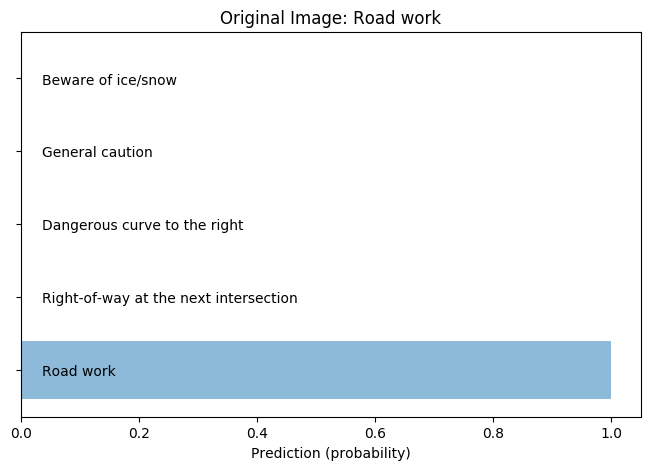

In [21]:
# Plot all bar graphs of softmax probability distribution
plt.rcdefaults()

for row in range( 0, results.indices.shape[0] ):
    objects = name_array[row]
    y_pos = np.arange(len(objects))
    probabilities = results.values[row]
    
    plt.figure(figsize=(8, 5))
    plt.barh(y_pos, probabilities, align='center', alpha=0.5)
    plt.yticks(y_pos, objects, position=(0.05,0), ha='left')
    plt.xlabel('Prediction (probability)')
    plt.title('Original Image: {}' .format(get_name_from_id(labels_array[row])))
    plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 